### Importing Libraries

In [3]:
#Importing packages
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

### Loading the data

In [4]:
#Loading the data
path = 'C:/Users/kamalesh k b/Downloads/1661-0.txt'
text = open(path,encoding = "utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


### Data Preprocessing

In [5]:
#Data Preprocessing
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 73


In [6]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [7]:
# generating our features and labels
#one hot encoding
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]


C:\Users\kamalesh k b\AppData\Local\Temp\ipykernel_13812\364776777.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
C:\Users\kamalesh k b\AppData\Local\Temp\ipykernel_13812\364776777.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(charact

'e'

In [8]:
#one hot encoded data
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [9]:
#one hot encoded data
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [10]:
X.shape

(193950, 40, 73)

In [11]:
y.shape

(193950, 73)

### Creating the model

In [12]:
# Creating the model
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

### Model summary

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               103424    
                                                                 
 dense (Dense)               (None, 73)                9417      
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 112841 (440.79 KB)
Trainable params: 112841 (440.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training our model

In [14]:
# Training our model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=7, 
                    shuffle=True).history

Epoch 1/7
1501/1501 [==============================] - 128s 84ms/step - loss: 2.0316 - accuracy: 0.4051 - val_loss: 2.2346 - val_accuracy: 0.3897
Epoch 2/7
1501/1501 [==============================] - 225s 150ms/step - loss: 1.6618 - accuracy: 0.5022 - val_loss: 2.0798 - val_accuracy: 0.4144
Epoch 3/7
1501/1501 [==============================] - 225s 150ms/step - loss: 1.5460 - accuracy: 0.5341 - val_loss: 1.9652 - val_accuracy: 0.4469
Epoch 4/7
1501/1501 [==============================] - 216s 144ms/step - loss: 1.4827 - accuracy: 0.5514 - val_loss: 1.9338 - val_accuracy: 0.4716
Epoch 5/7
1501/1501 [==============================] - 226s 151ms/step - loss: 1.4421 - accuracy: 0.5609 - val_loss: 1.9289 - val_accuracy: 0.4763
Epoch 6/7
1501/1501 [==============================] - 226s 151ms/step - loss: 1.4137 - accuracy: 0.5688 - val_loss: 1.9661 - val_accuracy: 0.4727
Epoch 7/7
1501/1501 [==============================] - 228s 152ms/step - loss: 1.3921 - accuracy: 0.5745 - val_loss: 1.

### saving our model

In [15]:
#saving our model
model.save('NW_keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

C:\Users\kamalesh k b\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### loading our model

In [16]:
#loading our model
model = load_model('NW_keras_model.h5')
history = pickle.load(open("history.p", "rb"))

### Model Evaluation 

In [17]:
#Model Evaluation
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 171s 28ms/step - loss: 1.3463 - accuracy: 0.5854
Test Loss 1.3463243246078491
Test Accuracy 0.5853931307792664


### Plotting training and validation plots

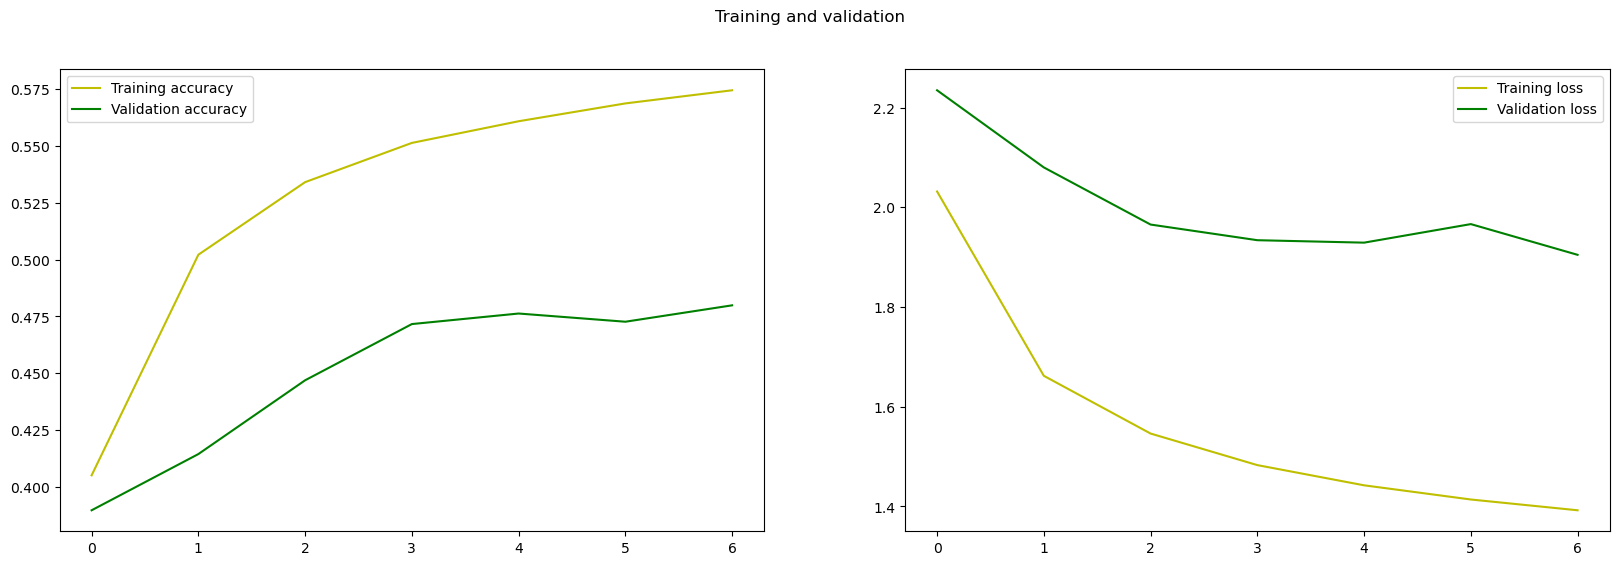

In [18]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [19]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### functions to get next probable characters

In [20]:
#functions to get next probable characters
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [21]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [22]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

### Prediction

In [33]:
#Prediction
quotes = [   
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "Machine learning  is the study of computer algorithms that improve automatically through experience and by the use of data.",
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN) is a type of artificial neural network which uses sequential data or time series data.",
    "Thanks for spending your precious time to view my work."  
    
]

In [36]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

deep learning is subset of machine learn
[' of ', 'ed ', '\nof ', '. ', 'ing ']

machine learning  is the study of comput
['ion ', 'e ', 'ation ', 'h ', ' and ']

it is not a lack of love, but a lack of 
['the ', 'my ', 'a ', 'her ', 'surprist. ']

recurrent neural network (rnn) is a type
['writing. ', 'rest ', 'ction ', 'arth ', 'ntion ']

thanks for spending your precious time t
['o ', 'he ', 'able ', 'ransard ', 'ime ']

